In [1]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.layer import Layers

%matplotlib inline

## Periodic Table of Elements

Read the data.

In [2]:
elements = pd.read_csv('data/elements.csv')
elements.head()

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,...,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,NaN,120.0,...,-73.0,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,NaN,32.0,NaN,140.0,...,0.0,gas,atomic,NaN,4.0,0.00000,noble gas,1868,18,1
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,...,-60.0,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,...,0.0,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,...,-27.0,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2


Alter the data types of the information that will be plotted. This makes it convenient to work with.

In [3]:
elements['group'] = [-1 if g == '-' else int(g) for g in elements.group]
elements['bonding type'] = elements['bonding type'].astype('category')
elements['metal'] = elements['metal'].astype('category')
elements['atomic_number'] = elements['atomic number'].astype(str)

The periodic table has two tables, a `top` and `bottom`. The elements in the `top` have groups, and those in the
`bottom` have no groups. We make separate dataframes for both -- they have different alignments.

In [4]:
top = elements.query('group != -1').copy()
bottom = elements.query('group == -1').copy()

The `top` table is nice and well behaving. The `x` location of the elements indicate the group and the `y` locations
the period.

In [5]:
top['x'] = top.group
top['y'] = top.period

The `bottom` table has 2 rows, with the `atomic number` increasing to the right.
We create an `x` based on the `atomic number` and add a `horizontal shift`.

As the dataframe is ordered by `atomic number`, the operation is easier.

The `bottom` elements are labelled with a "period". We add a vertical shift to give us a good `y` location
that gives the appearance of two tables.

In [6]:
nrows = 2
hshift = 3.5
vshift = 3
bottom['x'] = np.tile(np.arange(len(bottom)//nrows), nrows) + hshift
bottom['y'] = bottom.period + vshift

We will be plotting using tiles and we want to have some space between the tiles. We have set the `x` and `y` locations above to take up a unit of space. To get a good effect, the tile dimensions should be less than 1.

In [7]:
tile_width = 0.95
tile_height = 0.95

First peak

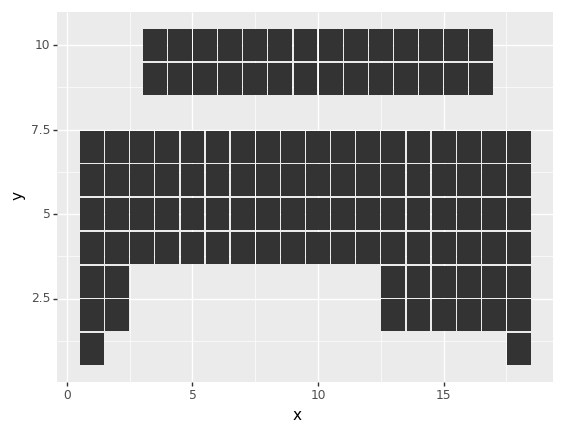

<ggplot: (97654321012345679)>

In [8]:
(ggplot(aes('x', 'y'))
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
)

The table upside down. We could have been more careful when creating the `y` locations since the periods are drawn in descending order. But, we can fix that with a `reverse` scale.

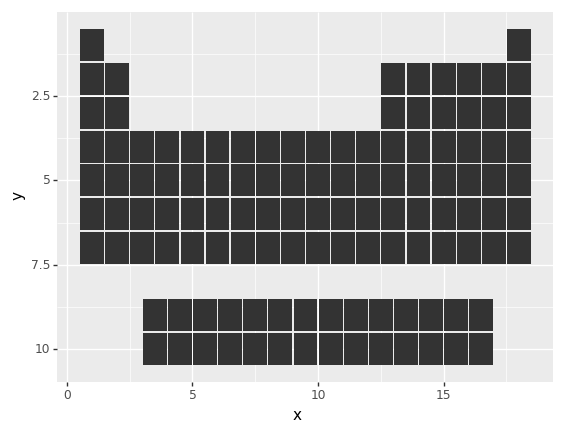

<ggplot: (97654321012345679)>

In [9]:
(ggplot(aes('x', 'y'))
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + scale_y_reverse() # new
)

Let us apply some color to it.

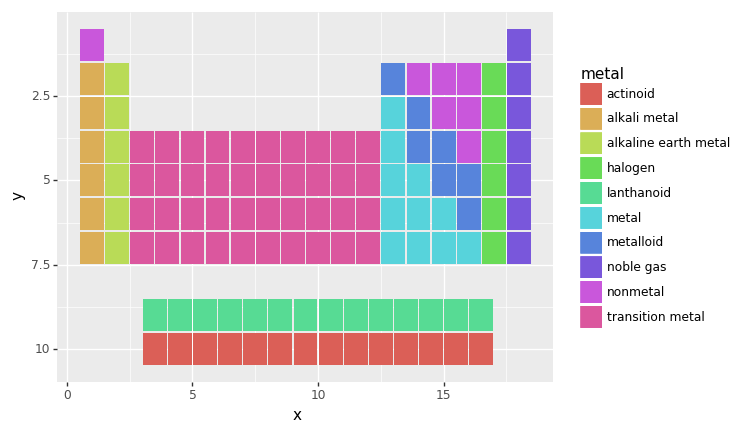

<ggplot: (97654321012345679)>

In [10]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')  # new
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + scale_y_reverse()
)

#### Now for some trick

Goal: To add text to the tiles

There are four pieces of text that we shall add to the tiles, that is 4 `geom_text` additions. 
As we have two tables, that comes to 8 `geom_text` additions. When any `geom` is added to a `ggplot` object,
behind the scenes a layer is created and added. We can create a group of layers that can be added to a `ggplot` object in one go, using the `Layers` class. It simply holds a list of `geoms` or `stats`.

We use a function that accepts a dataframe, and returns layers.

In [11]:
def inner_text(data):
    res = Layers([
        geom_text(data, aes(label='atomic_number'), nudge_x=-0.40, nudge_y=0.40,
                  ha='left', va='top', fontweight='normal', size=6),
        geom_text(data, aes(label='symbol'), nudge_y=.1, size=9),
        geom_text(data, aes(label='name'), nudge_y=-0.125, fontweight='normal', size=4.5),
        geom_text(data, aes(label='atomic mass'), nudge_y=-.3, fontweight='normal', size=4.5)])
    return res

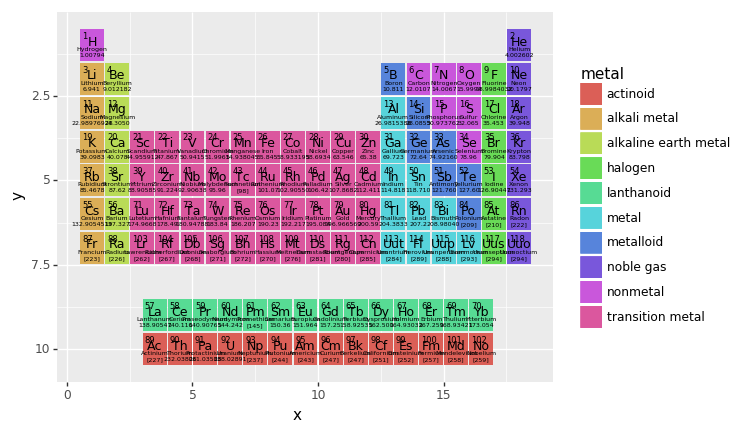

<ggplot: (97654321012345679)>

In [12]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)    # new
 + inner_text(bottom) # new
 + scale_y_reverse()
)

It is crowded in there and the tiles do not have equal dimentions. Use the `theme` create a larger figure.
`coord_equal` give us equal units along the axes, this makes the tiles square.

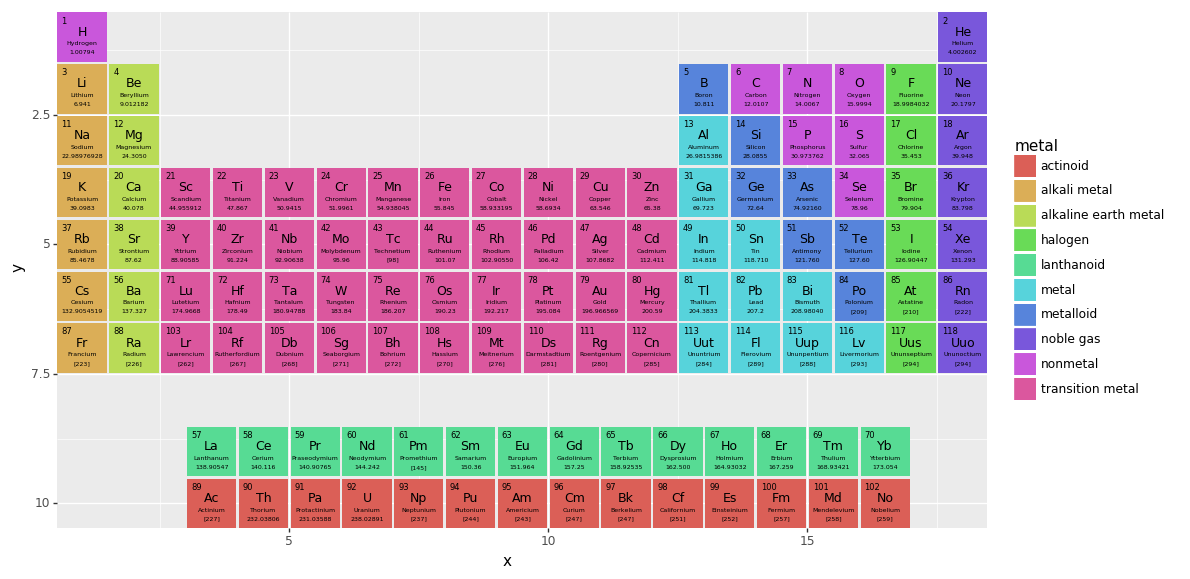

<ggplot: (97654321012345679)>

In [13]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + coord_equal(expand=False)   # new
 + theme(figure_size=(12, 6))  # new
)

It is has all the information we want, except one for complication. Elements `Lu` and `Lr` also belong in the
bottom table. One way to show this duality is to have tiles with two colors split horizontally.

The colors are determined by the `metal` field, and we know the `x` and `y` locations. We create a dataframe with this information to create a half-tile. A half-tile is centered at the quarter mark.

In [14]:
split_df = pd.DataFrame({
    'x': 3-tile_width/4,
    'y': [6, 7],
    'metal': pd.Categorical(['lanthanoid', 'actinoid'])
})

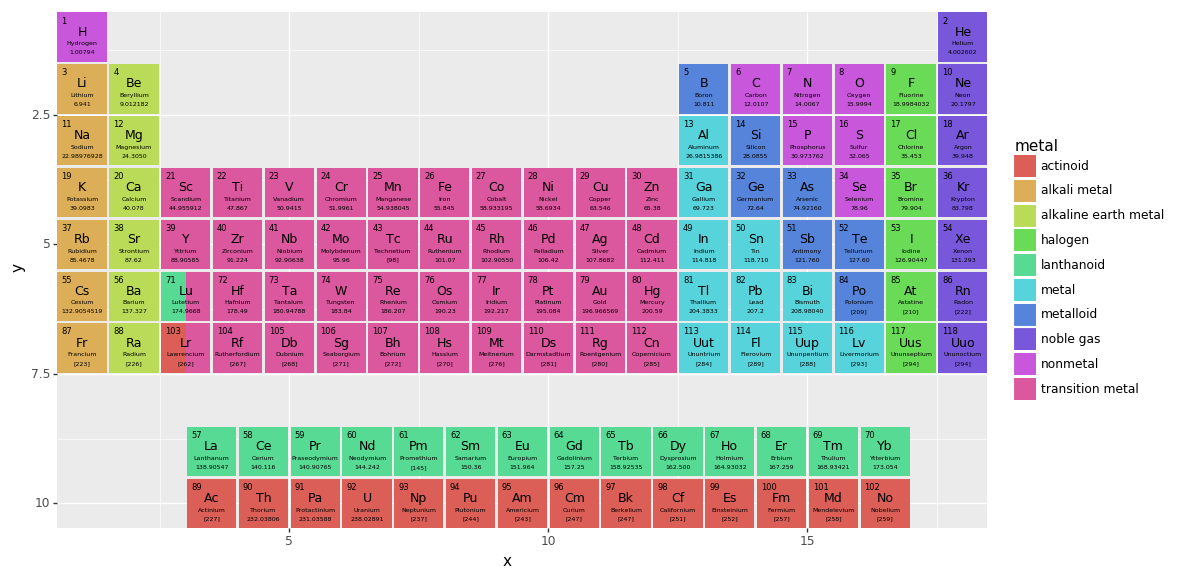

<ggplot: (97654321012345679)>

In [15]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))  # new
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + coord_equal(expand=False)
 + theme(figure_size=(12, 6))
)

Change the `fill` color for a different look and use a `theme` that clears out all the clutter.

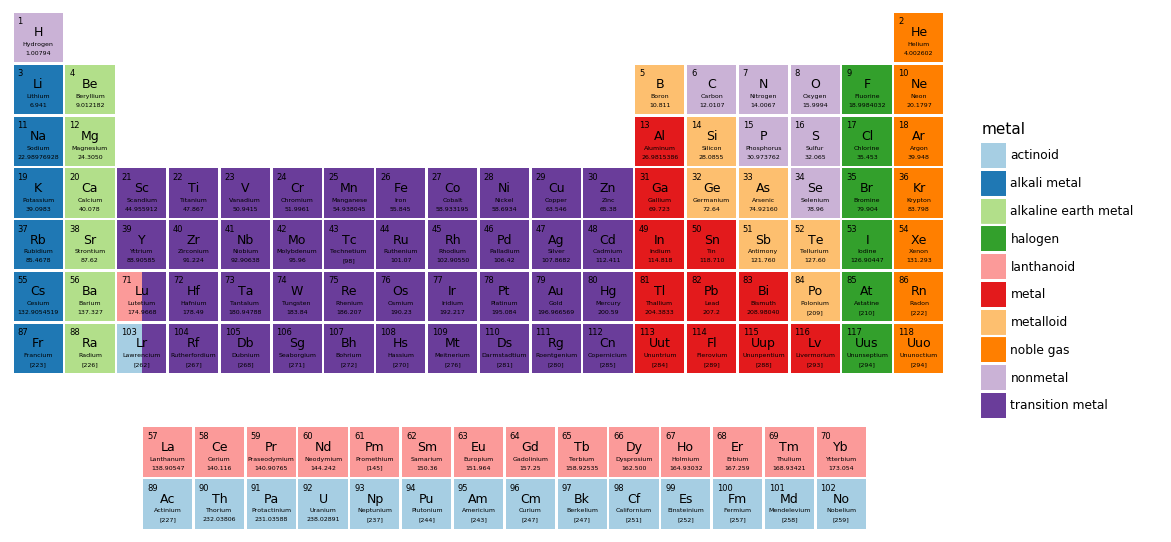

<ggplot: (97654321012345679)>

In [16]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + scale_fill_brewer(type='qual', palette=3)         # new
 + coord_equal(expand=False)
 + theme_void()                                      # new
 + theme(figure_size=(12, 6),
         plot_background=element_rect(fill='white')) # new
        
)

Add the group number along the top most row of each column, and period number along the left side of the top table.
We create the group information explicitly. If you have [plydata](http://github.com/has2k1/plydata) installed you could do.

```python
from plydata import group_by, summarise
groupdf = top >> group_by('group') >> summarise(y='min(period)')
```

There is probably a way to do it using straight up pandas.

For the period number, we set the `breaks` on the `y scale`.

In [17]:
groupdf = pd.DataFrame({
    'group': range(1, 19),
    'y': np.repeat([1, 2, 4, 2, 1], [1, 1, 10, 5, 1])})

Finally,

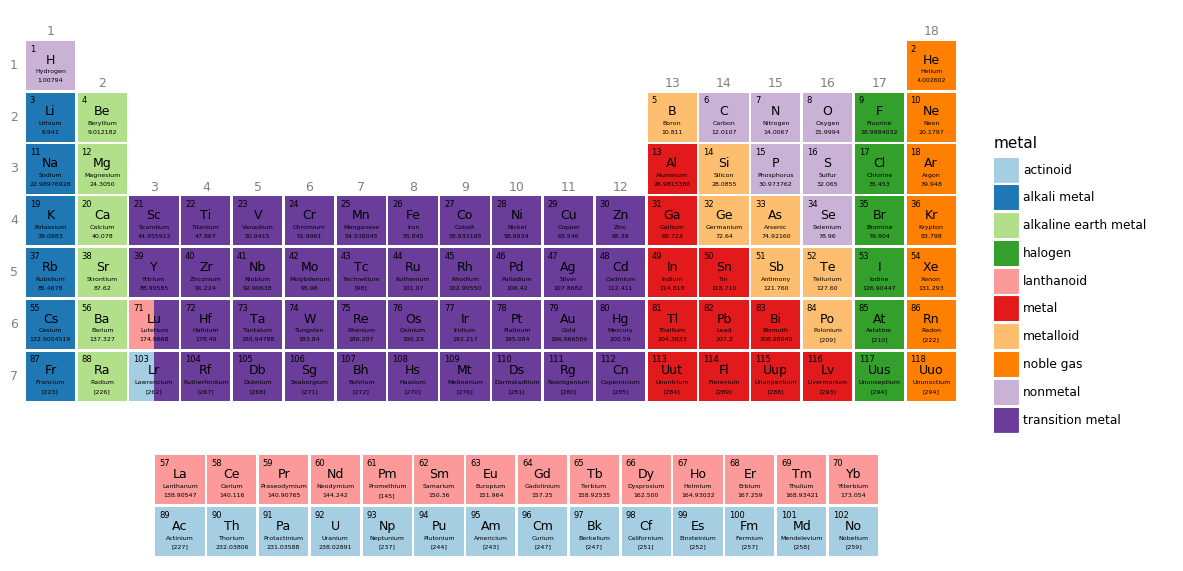

<ggplot: (97654321012345679)>

In [18]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + geom_text(groupdf, aes('group', 'y', label='group'), color='gray', nudge_y=.525,
             va='bottom',fontweight='normal', size=9, inherit_aes=False)    # new
 + scale_y_reverse(breaks=range(1, 8), limits=(0, 10.5))                    # modified
 + scale_fill_brewer(type='qual', palette=3) 
 + coord_equal(expand=False)
 + theme_void()
 + theme(figure_size=(12, 6),
         plot_background=element_rect(fill='white'),
         axis_text_y=element_text(margin={'r': 5}, color='gray', size=9)    # new
         )
)

What we could have done different:

1. After we set the `x` and `y` positions in th the `top` and `bottom` dataframes, we could have concatenated
   them back together. Then, that `Layers` trick would not save us much.

**Pro tip**: Save the plot as a pdf.